In [ ]:
@partial(jax.vmap, in_axes=(0, None))
def foo(x, y):
    return jnp.mean(x) + y

foo(jnp.array([1, 2, 3]), 1)

In [ ]:
def foo(x): # [10] -> [3]
    return jnp.dot(jnp.ones((3, 10)), x)

dfoo = jax.jacfwd(foo)

dfoo(jnp.ones(10))

In [2]:
from sklearn.datasets import load_digits
import jax.numpy as jnp

digits = load_digits()
X, Y = digits.data, digits.target


In [3]:
import matplotlib.pyplot as plt
import jax

In [4]:
# shuffle
indices = jax.random.permutation(jax.random.PRNGKey(0), jnp.arange(X.shape[0]))

X, Y = X[indices], Y[indices]


2024-09-21 03:44:13.616148: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.68). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


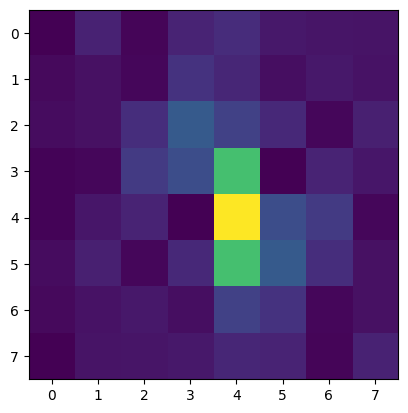

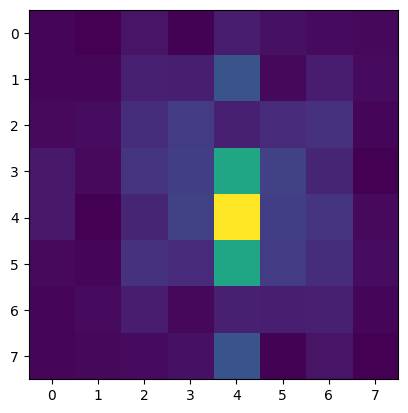

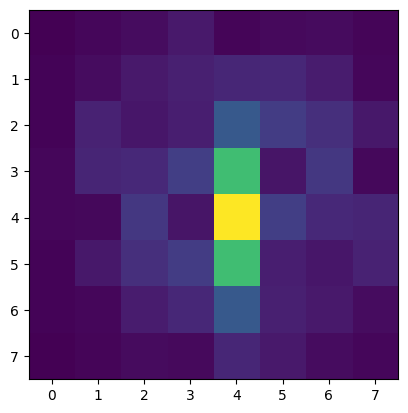

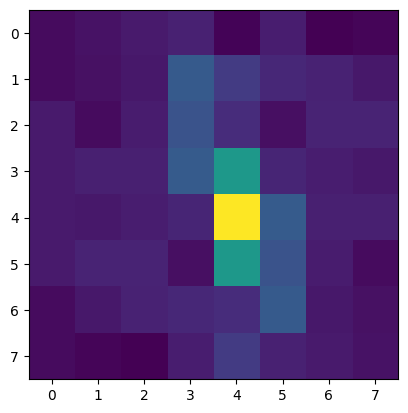

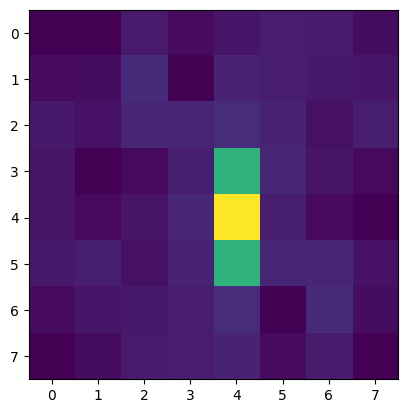

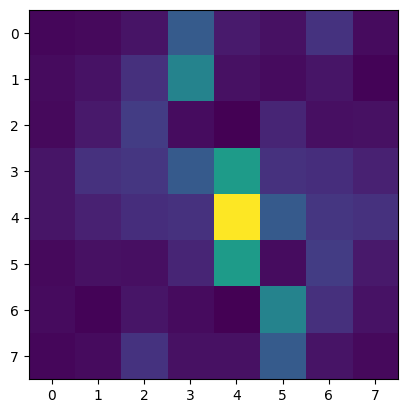

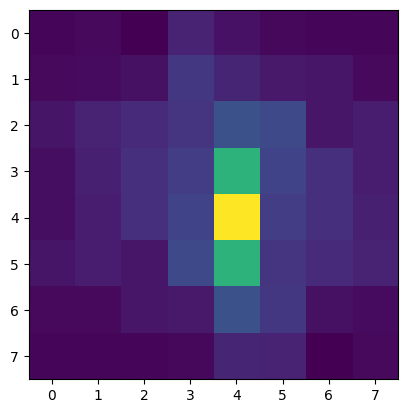

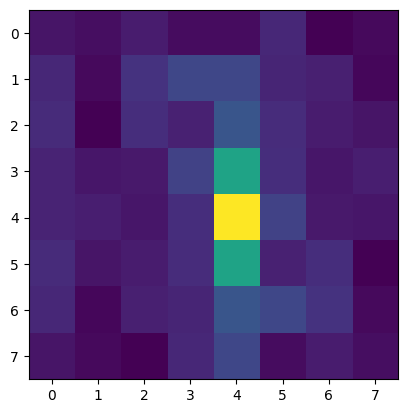

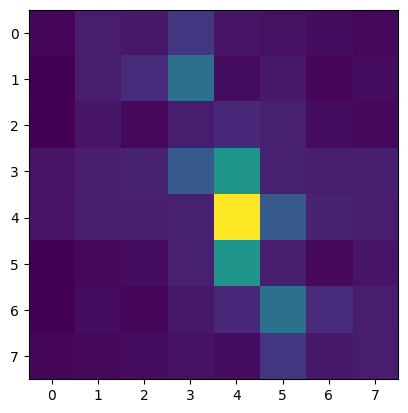

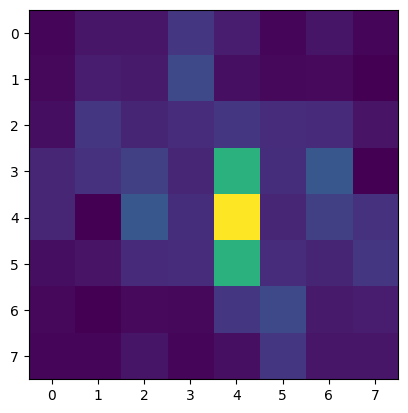

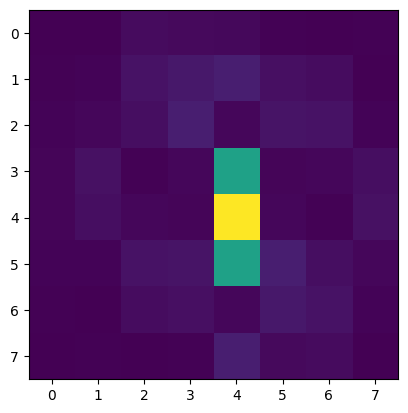

In [19]:


for i in range(10):
    # fourier transform
    X_ft = jnp.fft.fft(X[i])

    X_img = X_ft.reshape(8, 8)
    # cycle 4 pixels along each axis to put the center in the middle
    X_img = jnp.roll(X_img, 4, axis=0)
    X_img = jnp.roll(X_img, 4, axis=1)


    plt.imshow(jnp.abs(X_img))
    plt.show()

X_avg = jnp.mean(X, axis=0)
X_avg_ft = jnp.fft.fft(X_avg)
X_avg_img = X_avg_ft.reshape(8, 8)
X_avg_img = jnp.roll(X_avg_img, 4, axis=0)
X_avg_img = jnp.roll(X_avg_img, 4, axis=1)

plt.imshow(jnp.abs(X_avg_img))
plt.show()



(1797, 8, 8)


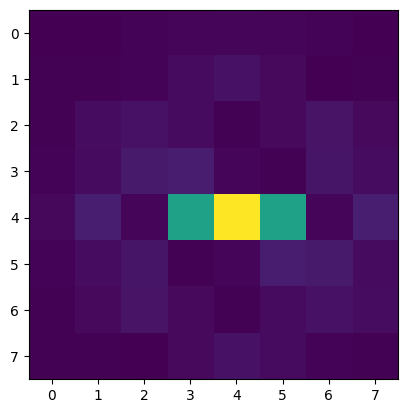

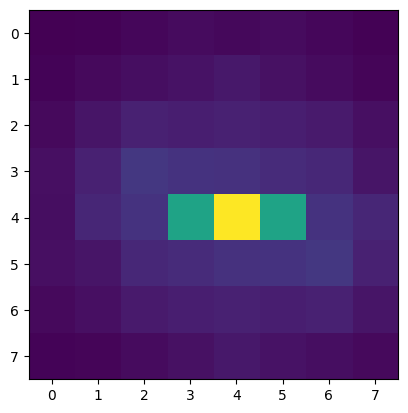

In [10]:
X_square = X.reshape(X.shape[0], 8, 8)
print(X_square.shape)

X_fft = jnp.fft.fftn(jnp.mean(X_square, axis=0))
X_fft_img = jnp.roll(X_fft, 4, axis=0)
X_fft_img = jnp.roll(X_fft_img, 4, axis=1)
plt.imshow(jnp.abs(X_fft_img))
plt.show()

X_fft_all = jax.vmap(jnp.fft.fftn)(X_square)
X_fft_all_img = jnp.mean(jnp.abs(X_fft_all), axis=0)
X_fft_all_img = jnp.roll(X_fft_all_img, 4, axis=0)
X_fft_all_img = jnp.roll(X_fft_all_img, 4, axis=1)
plt.imshow(jnp.abs(X_fft_all_img))
plt.show()

In [16]:
X.shape, Y.shape

((1797, 64), (1797,))